In [14]:
import os
import numpy as np
from tsnecuda import TSNE
from tqdm.auto import tqdm
from cache_decorator import Cache
from sklearn.preprocessing import RobustScaler
from repairing_genomic_gaps import build_multivariate_dataset_cae, get_model_weights_path
from repairing_genomic_gaps import cae_1000
from typing import Callable
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Latent space rendering

In [2]:
@Cache('cache/latent/{model_name}.pkl')
def build_latent(build_model:Callable, model_name:str):
    # Load the model
    auto, enc, dec = build_model(return_encoder_and_decoder=True, verbose=False)
    
    # Load the weights
    path = get_model_weights_path(auto, "./multivariate_gaps")
    if os.path.exists(path):
        auto.load_weights(path)
        print("Old Weights loaded from {}".format(path))

    ## Already tested that if we load the weights for auto
    ## the weights changes also for enc and dec
    
    # Load the dataset
    train, test = build_multivariate_dataset_cae(1000)
    # Render the latent space
    latent = np.vstack([
        enc.predict(point)
        for batch in tqdm(train, desc="Rendering the latent space")
        for point in batch
    ])
    return latent

In [3]:
latent = build_latent(cae_1000, model_name="cae_1000")

# Latent space normalizzation

In [4]:
normalized_latent = RobustScaler().fit_transform(latent)

In [5]:
normalized_latent.shape

(5417180, 200)

In [18]:
indices = np.random.choice(normalized_latent.shape[0], size=1000000, replace=False)

In [19]:
x = normalized_latent[indices]

In [20]:
x.shape

(1000000, 200)

# TSNE rendering

In [33]:
def build_tsne(latent, n_components=2):
    partial = PCA(n_components=50, random_state=42).fit_transform(latent)
    return TSNE(n_components=n_components, verbose=True, random_seed=42, n_iter=50000).fit_transform(latent)

In [34]:
t = build_tsne(x)

In [5]:
("1.0").is_integer()

AttributeError: 'str' object has no attribute 'is_integer'

In [10]:
from unidecode import unidecode

unidecode("ciaò")

ModuleNotFoundError: No module named 'unidecode'

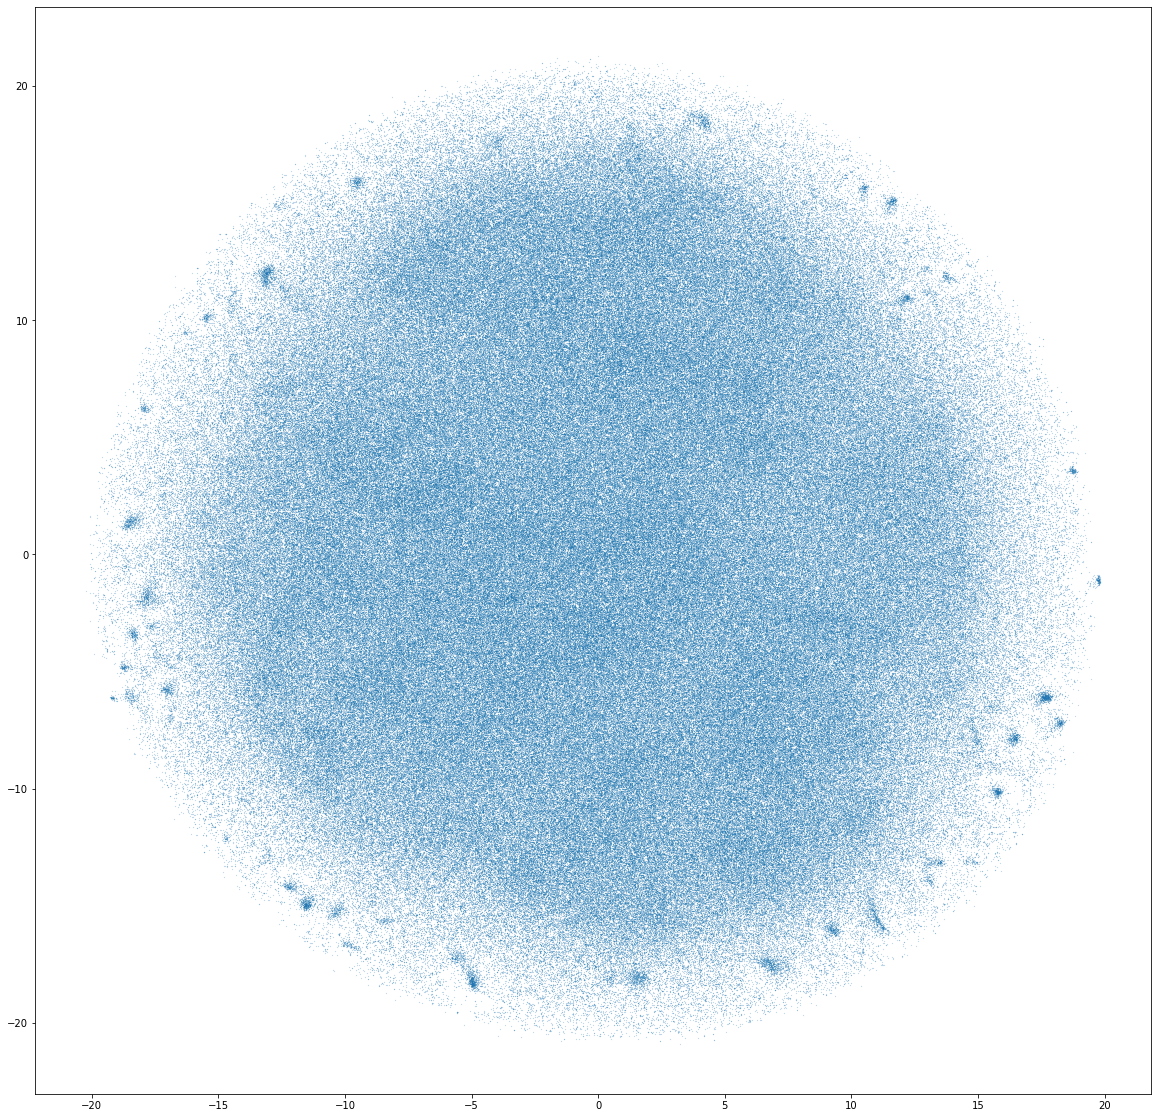

In [35]:
fig, axis = plt.subplots(figsize=(20,20))
plt.scatter(*t.T, s=0.01)
plt.show()

# TSNE visualizzation

# PCA rendering

# PCA visualizzation